<a href="https://colab.research.google.com/github/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/modelling/2_Ensemble_RandomForest_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Models - Random Forests and Extreme Gradient Boosting (XGBoost)**

## _Machine Learning Modelling Workflow Notebook 2_

## Content:
1. Splitting the dataframe into train and test subsets;
2. Retrieving the list of classes used for training the classification models;
3. Fitting the Random Forest Model;
4. Fitting the Extreme Gradient Boosting (XGBoost) Model;
5. Getting a general feature ranking;
6. Calculating metrics for regression models;
7. Calculating metrics for classification models;
8. Making predictions with the models;
9. Calculating probabilities associated to each class;
10. Performing the SHAP feature importance analysis;
11. Time series visualization.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

In [ ]:
# To install a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow
# to update a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow --upgrade
# to update pip, unmark and run:
# ! pip install pip --upgrade
# to show if a library is installed and visualize its information, unmark and run
# (e.g. tensorflow):
# ! pip show tensorflow
# To run a Python file (e.g idsw_etl.py) saved in the notebook's workspace directory,
# unmark and run:
# import idsw_etl
# or:
# import idsw_etl as etl

## **Load Python Libraries in Global Context**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import tensorflow as tf
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
# Run installed library
import idsw
from idsw import etl
from idsw import modelling
from idsw.etl import etl_workflow as ewf
from idsw.modelling import modelling_workflow as mwf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import tensorflow as tf
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
# Run installed library
import idsw
from etl import etl_workflow as ewf
from modelling import modelling_workflow as mwf

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [2]:
SOURCE = 'google'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
idsw.mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

Associate the Python environment to your Google Drive account, and authorize the access in the opened window.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Now your Python environment is connected to your Google Drive: the root directory of your environment is now the root of your Google Drive.
In Google Colab, navigate to the folder icon ('Files') of the left navigation menu to find a specific folder or file in your Google Drive.
Click on the folder or file name and select the elipsis (...) icon on the right of the name to reveal the option 'Copy path', which will give you the path to use as input for loading objects and files on your Python environment.
Caution: save your files into different directories of the Google Drive. If files are all saved in a same folder or directory, like the root path, they may not be accessible from your Python environment.
If you still cannot see the file after moving it 

### **Importing the dataset**

In [3]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset_transformed_log.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.48 ms
Type conversion took: 0.50 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/dataset_transformed_log.csv. Check the 10 first rows of this dataframe:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374
3,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708
4,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724
5,2018-01-09 18:00:00,1,2,9,1,1.0,0.0,0.0,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878
6,2018-01-11 00:00:00,1,2,11,4,0.0,0.0,1.0,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750
7,2018-01-12 06:00:00,1,2,12,6,1.0,0.0,0.0,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641
8,2018-01-13 12:00:00,1,2,13,7,1.0,0.0,0.0,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893
9,2018-01-14 18:00:00,1,2,14,1,1.0,0.0,0.0,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536


### **Separating and preparing features and responses tensors**

In [5]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week',
       'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc',
       'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log'],
      dtype='object')

As noticed in notebook cycle2_etl_3_Dataset_Transformation.ipynb

(https://github.com/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/cycle2_etl_2_Dataset_Characterization.ipynb):

- We can keep only one from variables week and month - let's keep month;
- We can keep only one from variables `lagging_current_reactive_power_kvarh_log` and `co2_tco2_log`. Since the more fundamental physical variable is `lagging_current_reactive_power_kvarh_log`, we can keep only this one when modelling.

In [4]:
DATASET = dataset  #Alternatively: object containing the dataset to be analyzed

FEATURES_COLUMNS = ['month', 'day', 'day_of_week', 'load_type_light_OneHotEnc',
       'load_type_maximum_OneHotEnc', 'load_type_medium_OneHotEnc',
       'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log']
# FEATURES_COLUMNS: list of strings or string containing the names of columns
# with predictive variables in the original dataframe. 
# Example: FEATURES_COLUMNS = ['col1', 'col2']; FEATURES_COLUMNS = 'predictor';
# FEATURES_COLUMNS = ['predictor'].

RESPONSE_COLUMNS = "usage_kwh_log"
# RESPONSE_COLUMNS: list of strings or string containing the names of columns
# with response variables in the original dataframe. 
# Example: RESPONSE_COLUMNS= ['col3', 'col4']; RESPONSE_COLUMNS = 'response';
# RESPONSE_COLUMNS = ['response']

# Arrays or tensors containing features and responses returned as X and y, respectively.
# Mapping dictionary correlating the position in array or tensor to the original column name
# returned as column_map_dict.
# Simply modify these objects on the left of equality:
X, y, column_map_dict = mwf.separate_and_prepare_features_and_responses (df = DATASET, features_columns = FEATURES_COLUMNS, response_columns = RESPONSE_COLUMNS)

Check the 5 first elements from the tensors or arrays obtained:

Features tensor or array:

tf.Tensor(
[[ 1.          1.          1.          1.          0.          0.
   1.50526188  2.06787491  4.42690937  4.18450387 10.49874623]
 [ 1.          2.          4.          1.          0.          0.
   3.16446892  0.03496488  4.4116714   4.58796044 10.61127701]
 [ 1.          3.          7.          1.          0.          0.
   0.7047875   2.29413281  4.45865583  4.13625929 10.71241577]
 [ 1.          6.          5.          1.          0.          0.
   2.30806174  1.32539366  4.28313934  4.4664482  10.49874623]
 [ 1.          8.          6.          1.          0.          0.
   1.44021026  1.79216217  4.40610727  4.26986527 10.71241577]], shape=(5, 11), dtype=float64)


Shape of the complete X tensor or array = (253, 11)

Responses tensor or array:

tf.Tensor(
[[2.09639084]
 [3.96974774]
 [2.14337441]
 [2.87170793]
 [2.45972416]], shape=(5, 1), dtype=float64)


Shape of the complete y

### **Splitting features and responses into train and test tensors**

In [5]:
X_tensor = X
# X_df = tensor or array of predictive variables. Alternatively, modify X, not X_tensor.
Y_tensor = y
# Y = tensor or array of response variables. Alternatively, modify y, not Y_tensor.

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 75   
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 0
# If you want to use cross-validation, separate a percent of the training data for validation.
# Declare this percent as PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION (float from 0 to 100).

# Subset and series destined to training, testing and/or validation returned in the dictionary split_dictionary;
# Simply modify this object on the left of equality:
split_dictionary = mwf.split_data_into_train_and_test (X = X_tensor, y = Y_tensor, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING, percent_of_training_data_used_for_model_validation = PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION)

X and y successfully splitted into train: X_train, y_train (75% of data); and test subsets: X_test, y_test (25% of data).


10 first rows from subset X_train:

tf.Tensor(
[[10.         20.          7.          1.          0.          0.
   1.95334671  1.84775903  4.39258425  4.22089889 10.71241577]
 [11.         27.          2.          0.          0.          1.
   2.9119611   0.06789227  4.46332817  4.57978229 10.49874623]
 [ 2.         13.          3.          1.          0.          0.
   1.70482385  2.16387843  4.4872262   4.17307487 10.80425847]
 [ 5.         24.          5.          0.          1.          0.
   2.71030876  0.99796288  4.39743646  4.51935718 10.80425847]
 [ 7.         26.          4.          0.          1.          0.
   2.61159437  0.55837693  4.32687283  4.54620632 10.61127701]
 [10.         30.          3.          1.          0.          0.
   3.06206216  0.65717452  4.37452775  4.53039725 10.71241577]
 [11.         22.          4.          1.          0.  

### **Fitting the Random Forest Model**

In [6]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 23.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


OOB Score: score of the training dataset obtained using an out-of-bag estimate = 
0.8865060839750648


Metrics for training:

Mean squared error (MSE) = 5.541019e-01
Root mean squared error (RMSE) = 1.890000e+02
Mean absolute error (MAE) = 6.755514e-01
Mean absolute percentage error (MAPE) = 2.494712e+01
Coefficient of linear correlation R² = 9.740066e-01
Adjusted coefficient of correlation R²-adj = 9.723912e-01


Metrics for testing:

Mean squared error (MSE) = 1.067841e+00
Root mean squared error (RMSE) = 6.400000e+01
Mean absolute error (MAE) = 9.397903e-01
Mean absolute percentage error (MAPE) = 4.008731e+01
Coefficient of linear correlation R² = 9.103858e-01
Adjusted coefficient of correlation R²-adj = 8.914289e-01


Feature importance ranking - until 20 most important features:



,predictive_features,feature_importances,abs_feature_importances
0,lagging_current_reactive_power_kvarh_log,0.869735,0.869735
1,lagging_current_power_factor_log,0.048473,0.048473
2,leading_current_power_factor_log,0.041719,0.041719
3,day,0.013938,0.013938
4,leading_current_reactive_power_kvarh_log,0.008559,0.008559
5,month,0.008501,0.008501
6,day_of_week,0.003893,0.003893
7,nsm_log,0.003165,0.003165
8,load_type_light_OneHotEnc,0.000961,0.000961
9,load_type_maximum_OneHotEnc,0.000609,0.000609




Feature relative importance bar chart:



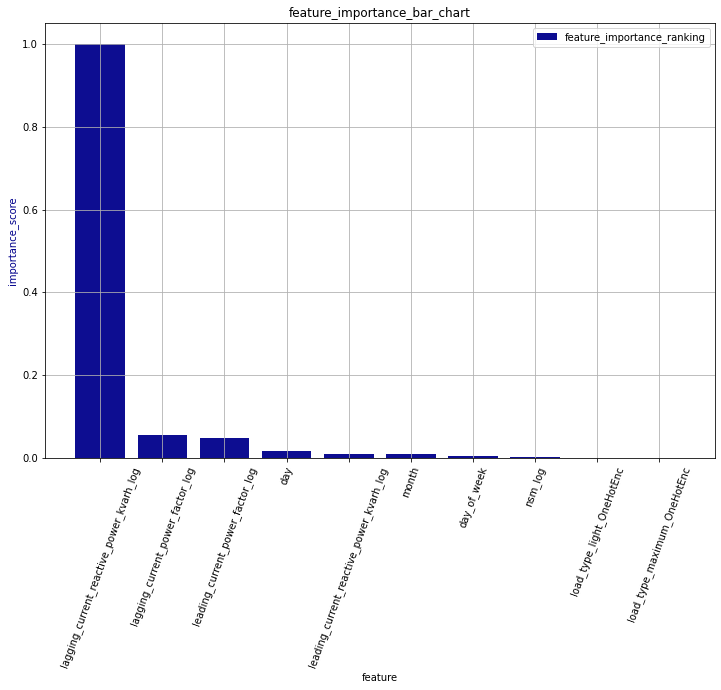



To reveal the decision path in the forest for a sample X, call the .decision_path method of the random forest model object. For example, declare:
path = rf_model.decision_path(X)
And then print path.


To predict the model output y_pred for a dataframe X, declare: y_pred = rf_model.predict(X)

For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):
X_train = np.reshape(np.array(X_train), (-1, 1))


In [7]:
# split_dictionary.keys() == dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'X_valid', 'y_valid'])

X_TRAIN = split_dictionary['X_train']
# X_TRAIN = tensor of predictive variables.
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = split_dictionary['y_train']
# Y_TRAIN = tensor of response variables.
# Alternatively, modify y_train, not Y_TRAIN

TYPE_OF_PROBLEM = "regression"
# TYPE_OF_PROBLEM = 'regression'; or TYPE_OF_PROBLEM = 'classification'
# The default is 'regression', which will be used if no type is
# provided.

NUMBER_OF_TREES = 100
# NUMBER_OF_TREES = 100 (integer) - number of trees in the forest
# it is the n_estimators parameter of the model.

MAX_TREE_DEPTH = None
# MAX_TREE_DEPTH = None - integer representing the maximum depth 
# permitted for the trees (base learners). If None, then nodes are expanded 
# until all leaves are pure or until all leaves contain less 
# than MIN_SAMPLES_TO_SPLIT_NODE samples.
# it is the max_depth parameter of the model.

MIN_SAMPLES_TO_SPLIT_NODE = 2
# MIN_SAMPLES_TO_SPLIT_NODE = 2 (integer or float). It is the 
# min_samples_split parameter of the model.
# The minimum number of samples required to split an internal node:
# If int, then consider MIN_SAMPLES_TO_SPLIT_NODE as the minimum number.
# If float, then MIN_SAMPLES_TO_SPLIT_NODE is a fraction and ceil
# (MIN_SAMPLES_TO_SPLIT_NODE * NUMBER_OF_TREES) are the minimum number 
# of samples for each split.
    
MIN_SAMPLES_TO_MAKE_LEAF = 2
# MIN_SAMPLES_TO_MAKE_LEAF = 2 (integer or float). It is the
# min_samples_leaf parameter of the model.
# The minimum number of samples required to be at a leaf node. 
# A split point at any depth will only be considered if it leaves at 
# least MIN_SAMPLES_TO_MAKE_LEAF training samples in each of the left and right branches. 
# This may have the effect of smoothing the model, especially in regression.
# If int, then consider MIN_SAMPLES_TO_MAKE_LEAF as the minimum number.
# If float, then MIN_SAMPLES_TO_MAKE_LEAF is a fraction and ceil
# (MIN_SAMPLES_TO_MAKE_LEAF * NUMBER_OF_TREES) are the minimum number 
# of samples for each node.

BOOTSTRAP_SAMPLES = True
# BOOTSTRAP_SAMPLES = True. Parameter bootstrap of the model.
# Whether bootstrap samples are used when building trees. If False, 
# the whole dataset is used to build each tree.

USE_OUT_OF_BAG_ERROR = True
# USE_OUT_OF_BAG_ERROR = True. Parameter oob_score of the model.
# Whether to use out-of-bag (OOB) samples to estimate the generalization score. 
# Only available if BOOTSTRAP_SAMPLES = True.
# OOB is the equivalent of the using batches for training the neural network:
# when using OOB, the training data is divided into several subsets, and these
# subsets are used for separately training the model.
    
# Importantly: random forest combines several decision trees, by randomnly selecting
# variables for making the tree leafs and nodes; and ramdonly setting the depth of
# the trees. The use of out-of-bag guarantees that the data used for the construction
# of the trees is randomly selected.
# If not using, the model will be highly susceptive of overfitting due to the use of
# the whole dataset. Also, the calculated metrics will be over estimated.
# This phenomenon is characteristic from ensemble algorithms like random forests, and
# is not usually observed on linear regressions.

# Tensors of data separated for model testing:
#X_TEST = None
#Y_TEST = None
X_TEST = split_dictionary['X_test']
Y_TEST = split_dictionary['y_test']

# Tensors of data separated for model validation:
X_VALID = None
Y_VALID = None
#X_VALID = split_dictionary['X_valid']
#Y_VALID = split_dictionary['y_valid']

COLUMN_MAP_DICT = column_map_dict
#COLUMN_MAP_DICT = None
# COLUMN_MAP_DICT: Mapping dictionary correlating the position in array or tensor to the original 
# column name.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"
EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'feature_importance_ranking.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Model object returned as rf_model;
# Summary dictionary storing the feature ranking importance dataframe and the classes count and
# possible values (for a classification problem) returned as summary_dict;
# Simply modify these objects on the left of equality:
rf_model, summary_dict = mwf.RANDOM_FOREST (X_train = X_TRAIN, y_train = Y_TRAIN, type_of_problem = TYPE_OF_PROBLEM, number_of_trees = NUMBER_OF_TREES, max_tree_depth = MAX_TREE_DEPTH, min_samples_to_split_node = MIN_SAMPLES_TO_SPLIT_NODE, min_samples_to_make_leaf = MIN_SAMPLES_TO_MAKE_LEAF, bootstrap_samples = BOOTSTRAP_SAMPLES, use_out_of_bag_error = USE_OUT_OF_BAG_ERROR, X_test = X_TEST, y_test = Y_TEST, X_valid = X_VALID, y_valid = Y_VALID, column_map_dict = COLUMN_MAP_DICT, orientation = ORIENTATION, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Fitting the Extreme Gradient Boosting (XGBoost) Model**

[02:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Metrics for training:

Mean squared error (MSE) = 5.737091e-01
Root mean squared error (RMSE) = 1.890000e+02
Mean absolute error (MAE) = 6.833435e-01
Mean absolute percentage error (MAPE) = 2.523487e+01
Coefficient of linear correlation R² = 9.999296e-01
Adjusted coefficient of correlation R²-adj = 9.999252e-01


Metrics for testing:

Mean squared error (MSE) = 1.056336e+00
Root mean squared error (RMSE) = 6.400000e+01
Mean absolute error (MAE) = 9.398289e-01
Mean absolute percentage error (MAPE) = 4.008895e+01
Coefficient of linear correlation R² = 9.168609e-01
Adjusted coefficient of correlation R²-adj = 8.992737e-01


Feature importance ranking - until 20 most important features:



,predictive_features,feature_importances,abs_feature_importances
0,lagging_current_reactive_power_kvarh_log,0.555953,0.555953
1,leading_current_power_factor_log,0.341330,0.341330
2,lagging_current_power_factor_log,0.046375,0.046375
3,leading_current_reactive_power_kvarh_log,0.014118,0.014118
4,day,0.011746,0.011746
5,nsm_log,0.008845,0.008845
6,load_type_maximum_OneHotEnc,0.007310,0.007310
7,load_type_medium_OneHotEnc,0.005382,0.005382
8,day_of_week,0.004284,0.004284
9,month,0.002437,0.002437




Feature relative importance bar chart:



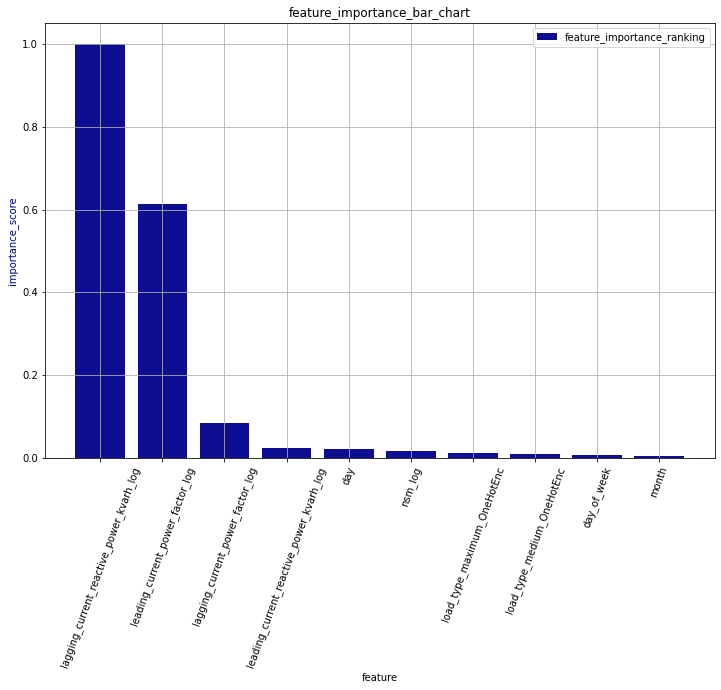



To predict the model output y_pred for a dataframe X, declare: y_pred = xgb_model.predict(X)

For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):
X_train = np.reshape(np.array(X_train), (-1, 1))


In [22]:
# split_dictionary.keys() == dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'X_valid', 'y_valid'])

X_TRAIN = split_dictionary['X_train']
# X_TRAIN = tensor of predictive variables.
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = split_dictionary['y_train']
# Y_TRAIN = tensor of response variables.
# Alternatively, modify y_train, not Y_TRAIN

TYPE_OF_PROBLEM = "regression"
# TYPE_OF_PROBLEM = 'regression'; or TYPE_OF_PROBLEM = 'classification'
# The default is 'regression', which will be used if no type is
# provided.

NUMBER_OF_TREES = 100
# NUMBER_OF_TREES = 100 (integer) - number of gradient boosted trees. 
# Equivalent to number of boosting rounds.
# it is the n_estimators parameter of the model.

MAX_TREE_DEPTH = 20
# MAX_TREE_DEPTH = 20 - integer representing the maximum depth 
# permitted for the trees (base learners).

PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE = 75
# PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE = 75 (float or None).
# If this value is set, it defines the percent of data that will be ramdonly
# selected for training the models.
# e.g. PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE = 80 uses 80% of the data. If None,
# it uses the whole training set (100%)
    
# The subsampling of the dataset is the XGBoost equivalent to using the
# Out-of-bag (OOB) error in Random Forest.
# OOB, in turns, is the equivalent of the using batches for training the neural network:
# when using OOB, the training data is divided into several subsets, and these
# subsets are used for separately training the model.
# Importantly: random forest and XGBoost combine several decision trees, by randomnly selecting
# variables for making the tree leafs and nodes; and ramdonly setting the depth of
# the trees. The use of out-of-bag guarantees that the data used for the construction
# of the trees is randomly selected.
# If not using, the model will be highly susceptive of overfitting due to the use of
# the whole dataset. Also, the calculated metrics will be over estimated.
# This phenomenon is characteristic from ensemble algorithms like random forests, and
# XGBoost, and is not usually observed on linear regressions.

# Tensors of data separated for model testing:
#X_TEST = None
#Y_TEST = None
X_TEST = split_dictionary['X_test']
Y_TEST = split_dictionary['y_test']

# Tensors of data separated for model validation:
X_VALID = None
Y_VALID = None
#X_VALID = split_dictionary['X_valid']
#Y_VALID = split_dictionary['y_valid']

COLUMN_MAP_DICT = column_map_dict
#COLUMN_MAP_DICT = None
# COLUMN_MAP_DICT: Mapping dictionary correlating the position in array or tensor to the original 
# column name.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"
EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'feature_importance_ranking.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Model object returned as xgb_model;
# Summary dictionary storing the feature ranking importance dataframe and the classes count and
# possible values (for a classification problem) returned as summary_dict;
# Simply modify these objects on the left of equality:
xgb_model, summary_dict = mwf.XGBOOST (X_train = X_TRAIN, y_train = Y_TRAIN, type_of_problem = TYPE_OF_PROBLEM, number_of_trees = NUMBER_OF_TREES, max_tree_depth = MAX_TREE_DEPTH, percent_of_training_set_to_subsample = PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE, X_test = X_TEST, y_test = Y_TEST, X_valid = X_VALID, y_valid = Y_VALID, column_map_dict = COLUMN_MAP_DICT, orientation = ORIENTATION, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Making predictions with the models**

# Let's use the sensitivity analysis datasets obtained for making predictions:
- lagging_current_reactive_power_kvarh_log
- lagging_current_power_factor_log
- leading_current_power_factor_log

In [8]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption/modelling"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "lagging_current_reactive_power_kvarh_log_sensitivity_df.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
lagging_current_reactive_power_kvarh_log_df = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.22 ms
Type conversion took: 0.34 ms
Parser memory cleanup took: 0.00 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/modelling/lagging_current_reactive_power_kvarh_log_sensitivity_df.csv. Check the 10 first rows of this dataframe:



,lagging_current_reactive_power_kvarh_log,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log
0,0.394179,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
1,0.457502,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
2,0.520824,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
3,0.584146,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
4,0.647468,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
5,0.710790,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
6,0.774112,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
7,0.837434,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
8,0.900756,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947
9,0.964079,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,-4.531031,4.382036,4.453286,10.658947


In [9]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption/modelling"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "lagging_current_power_factor_log_sensitivity_df.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
lagging_current_power_factor_log_df = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.09 ms
Type conversion took: 0.28 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/modelling/lagging_current_power_factor_log_sensitivity_df.csv. Check the 10 first rows of this dataframe:



,lagging_current_power_factor_log,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,leading_current_power_factor_log,nsm_log
0,4.192176,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
1,4.198917,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
2,4.205658,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
3,4.212400,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
4,4.219141,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
5,4.225882,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
6,4.232624,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
7,4.239365,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
8,4.246106,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947
9,4.252848,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.453286,10.658947


In [10]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption/modelling"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "leading_current_power_factor_log_sensitivity_df.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
leading_current_power_factor_log_df = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.08 ms
Type conversion took: 1.85 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/modelling/leading_current_power_factor_log_sensitivity_df.csv. Check the 10 first rows of this dataframe:



,leading_current_power_factor_log,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,nsm_log
0,3.973461,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
1,3.986095,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
2,3.998729,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
3,4.011364,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
4,4.023998,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
5,4.036632,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
6,4.049266,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
7,4.061900,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
8,4.074534,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947
9,4.087168,6.071146,24.56917,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,-4.531031,4.382036,10.658947


In [11]:
# Prepare tensors X1, X2, and X3
lagging_current_reactive_power_kvarh_log_df.drop(['week', 'co2_tco2_log'], axis = 1, inplace = True)
X1 = tf.constant(lagging_current_reactive_power_kvarh_log_df)
lagging_current_power_factor_log_df.drop(['week', 'co2_tco2_log'], axis = 1, inplace = True)
X2 = tf.constant(lagging_current_power_factor_log_df)
leading_current_power_factor_log_df.drop(['week', 'co2_tco2_log'], axis = 1, inplace = True)
X3 = tf.constant(leading_current_power_factor_log_df)

In [25]:
MODEL_OBJECT = rf_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_tensor = X1
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = lagging_current_reactive_power_kvarh_log_df 
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output1 = mwf.make_model_predictions (model_object = MODEL_OBJECT, X = X_tensor, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, col_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX)

Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == 'deep_learning'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.
The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.
The prediction was added as the new column y_pred of the dataframe, and this dataframe was returned. Check its 10 first rows:



,lagging_current_reactive_power_kvarh_log,month,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,leading_current_reactive_power_kvarh_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,y_pred
0,0.394179,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
1,0.457502,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
2,0.520824,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
3,0.584146,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
4,0.647468,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
5,0.710790,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
6,0.774112,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
7,0.837434,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
8,0.900756,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999
9,0.964079,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,1.021076,4.382036,4.453286,10.658947,2.399999


In [26]:
MODEL_OBJECT = rf_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_tensor = X2
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = lagging_current_power_factor_log_df
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output2 = mwf.make_model_predictions (model_object = MODEL_OBJECT, X = X_tensor, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, col_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX)

Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == 'deep_learning'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.
The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.
The prediction was added as the new column y_pred of the dataframe, and this dataframe was returned. Check its 10 first rows:



,lagging_current_power_factor_log,month,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,leading_current_power_factor_log,nsm_log,y_pred
0,4.192176,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
1,4.198917,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
2,4.205658,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
3,4.212400,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
4,4.219141,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
5,4.225882,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
6,4.232624,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
7,4.239365,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
8,4.246106,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211
9,4.252848,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.453286,10.658947,2.335211


In [18]:
MODEL_OBJECT = rf_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_tensor = X3
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = leading_current_power_factor_log_df 
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output3 = mwf.make_model_predictions (model_object = MODEL_OBJECT, X = X_tensor, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, col_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX)

Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == 'deep_learning'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.
The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.
The prediction was added as the new column y_pred of the dataframe, and this dataframe was returned. Check its 10 first rows:



,leading_current_power_factor_log,month,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,lagging_current_power_factor_log,nsm_log,y_pred
0,3.973461,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.340252
1,3.986095,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.340252
2,3.998729,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.340252
3,4.011364,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668
4,4.023998,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668
5,4.036632,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668
6,4.049266,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668
7,4.061900,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668
8,4.074534,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668
9,4.087168,6.071146,15.521739,3.873518,0.671937,0.13834,0.189723,2.518178,1.021076,4.382036,10.658947,2.336668


### **Series visualization**

1 valid series input.



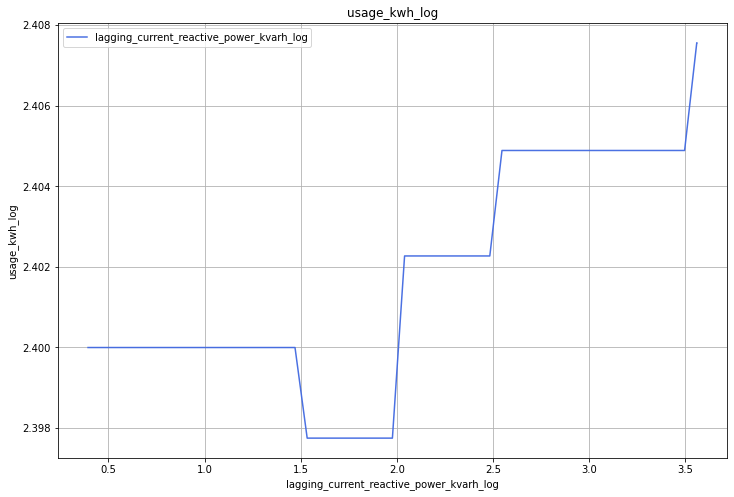

In [39]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': prediction_output1['lagging_current_reactive_power_kvarh_log'], 'y': prediction_output1['y_pred'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = 'lagging_current_reactive_power_kvarh_log' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.



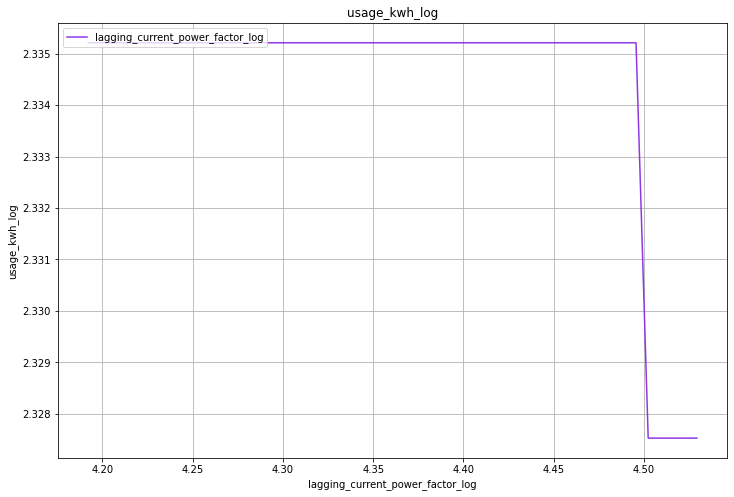

In [40]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': prediction_output2['lagging_current_power_factor_log'], 'y': prediction_output2['y_pred'], 'lab': 'lagging_current_power_factor_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = 'lagging_current_power_factor_log' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.



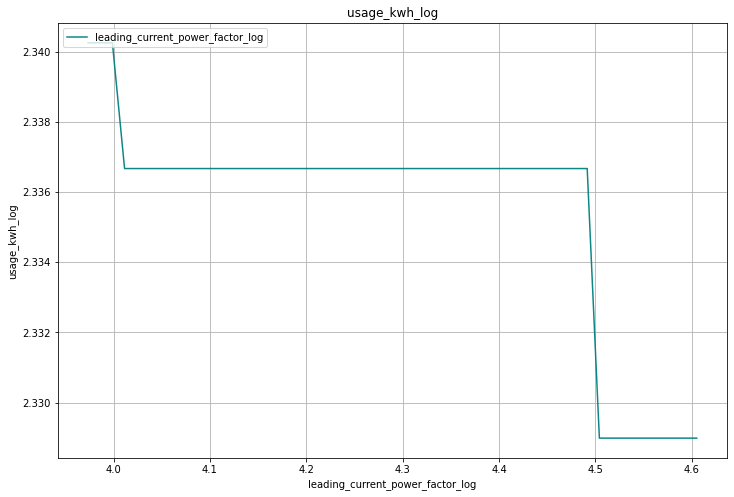

In [46]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': prediction_output3['leading_current_power_factor_log'], 'y': prediction_output3['y_pred'], 'lab': 'leading_current_power_factor_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = 'leading_current_power_factor_log' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Importing or exporting models and dictionaries (or lists)**

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_lambda' for deep learning tensorflow models containing 
# lambda layers. Such models are compressed as tar.gz.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

#### Case 4: export a model and/or a dictionary (or a list)

In [15]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = "rf_model"
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_lambda' for deep learning tensorflow models containing 
# lambda layers. Such models are compressed as tar.gz.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = rf_model 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

idsw.import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

Scikit-learn model successfully exported as rf_model.dill.
Export of files completed.


In [16]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = "xgb_model"
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'xgb_regressor'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_lambda' for deep learning tensorflow models containing 
# lambda layers. Such models are compressed as tar.gz.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = xgb_model 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

idsw.import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

XGBoost model successfully exported as xgb_model.json.
Export of files completed.


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [48]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = prediction_output1
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_with_predictions1"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_with_predictions1 exported as CSV file to notebook's workspace as 'dataset_with_predictions1.csv'.


In [49]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = prediction_output2
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_with_predictions2"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_with_predictions2 exported as CSV file to notebook's workspace as 'dataset_with_predictions2.csv'.


In [50]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = prediction_output3
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_with_predictions3"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_with_predictions3 exported as CSV file to notebook's workspace as 'dataset_with_predictions3.csv'.


## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 2: download a file from Colab's workspace

In [17]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "rf_model.dill"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File rf_model.dill successfully downloaded from Colab environment.


In [18]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "xgb_model.json"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File xgb_model.json successfully downloaded from Colab environment.


In [51]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_with_predictions1.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_with_predictions1.csv successfully downloaded from Colab environment.


In [52]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_with_predictions2.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_with_predictions2.csv successfully downloaded from Colab environment.


In [53]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_with_predictions3.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_with_predictions3.csv successfully downloaded from Colab environment.
